In [25]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [26]:
%matplotlib inline

In [27]:
#!dir

### Pipelines testing¶

#### Canny canonical method

{'min': 0.92}
{'min': 0.2, 'max': 1.6}
Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




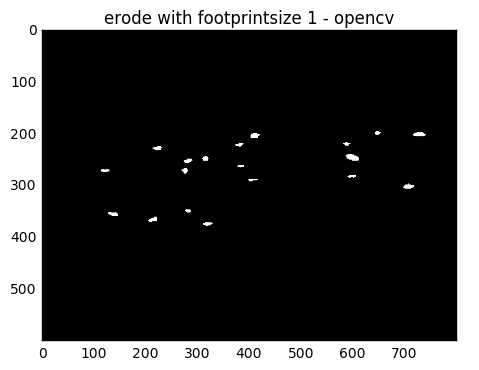

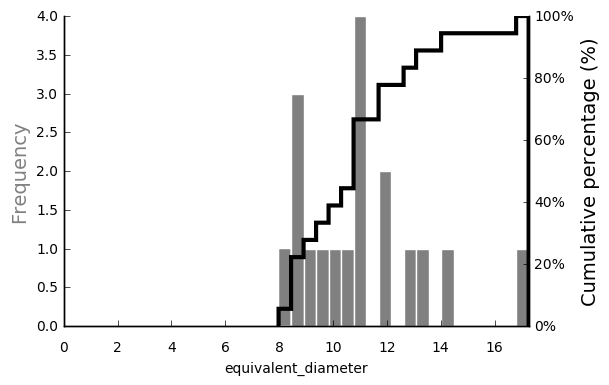

In [51]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run([120, 180], 3, 3, 1, 1)  # executing the pipeline with custom parameters
marker_image, props = bubble_properties_calculate(result)  # extract the properties
#filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
bubbler.plot()
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()
#plt.savefig('BSDhist.png')

#### Adaptive threshold method

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




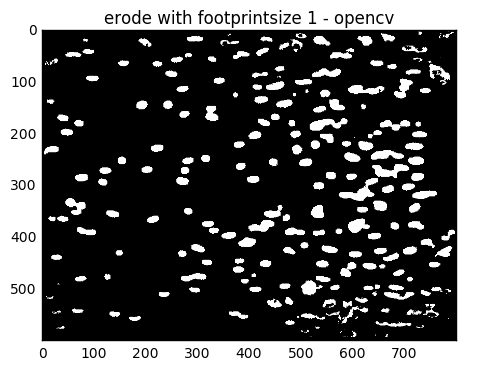

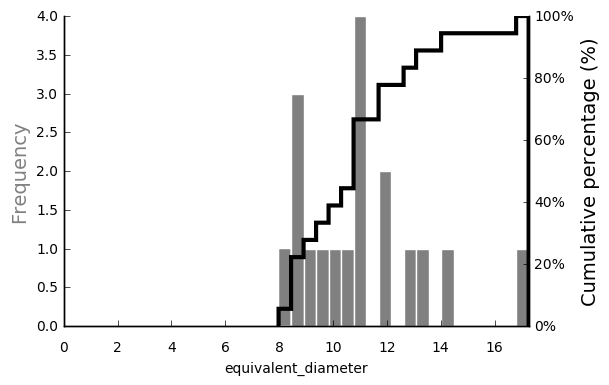

In [54]:
bubbler = AdaptiveThresholdPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run(91, 18, 3, 1, 1)  # executing the pipeline with custom parameters
bubbler.plot()
#marker_image, props = bubble_properties_calculate(result)  # extract the properties ## nbubbles, to include
#filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()

### Custom sequence

#### Try a first sequence with [30, 80] custom settings of Canny

Steps undertaken since from raw image:
edge-detect with thresholds 30 -> 80 - opencv
dilate with footprintsize 3 - opencv




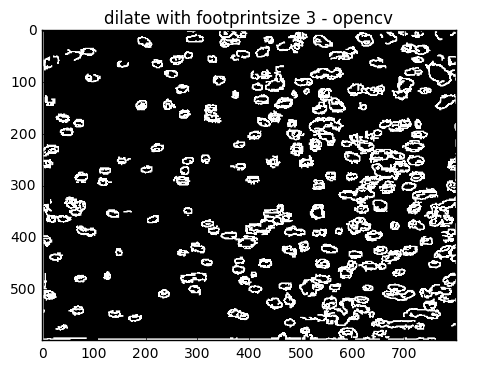

In [39]:
bubbler = BubbleKicker('0325097m_0305.tif', channel='red')
bubbler.edge_detect_canny_opencv([30, 80]) # canny edge detection givin the two parameters to build the gaussian
bubbler.dilate_opencv(3) # dilate using opencv function
bubbler.plot();
bubbler.what_have_i_done()

#### we can see that too many edges are detected, we need to refine, let's now try with [90, 120]¶

Steps undertaken since from raw image:
edge-detect with thresholds 90 -> 120 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




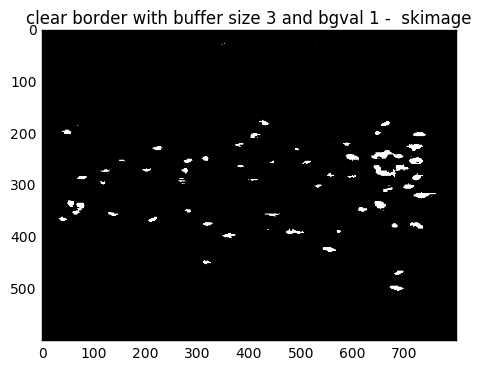

In [40]:
bubbler.reset_to_raw()
bubbler.edge_detect_canny_opencv([90, 120])
bubbler.dilate_opencv(3)
bubbler.clear_border_skimage(3, 1)
bubbler.plot();
bubbler.what_have_i_done()

#### a not adaptive method can be limiting with a uneven background, let's now try the adaptive detection in custom mode¶

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




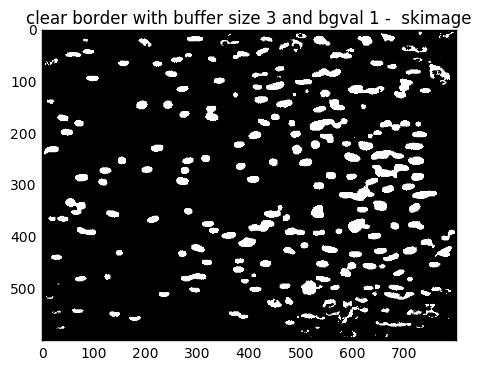

In [41]:
bubbler.reset_to_raw() # here we are running things in default mode
bubbler.adaptive_threshold_opencv()
bubbler.clear_border_skimage()
bubbler.plot()
bubbler.what_have_i_done()

### Now we might be ready to go for a batch of images

In [42]:
res = batchbubblekicker('sample_images', 'red',
                        AdaptiveThresholdPipeline,
                        91, 18, 3, 1, 1)

### Bubble properties

#### bubble properties can be returned as a table¶

{'min': 0.92}
{'min': 0.2, 'max': 1.6}


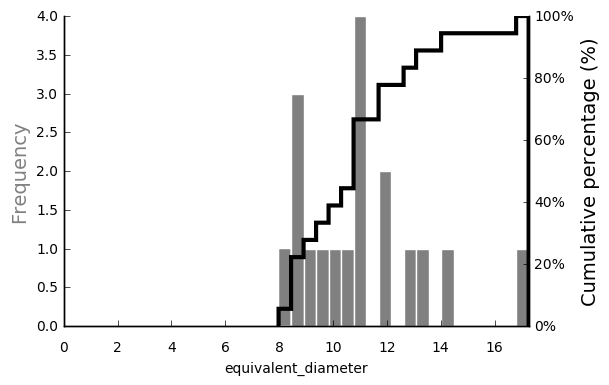

In [43]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
marker_image, props = bubble_properties_calculate(result) #output do add nbubbles, 
#print(nbubbles)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")

##### ...for the ease of object selection and futher filtering, based on default parameters

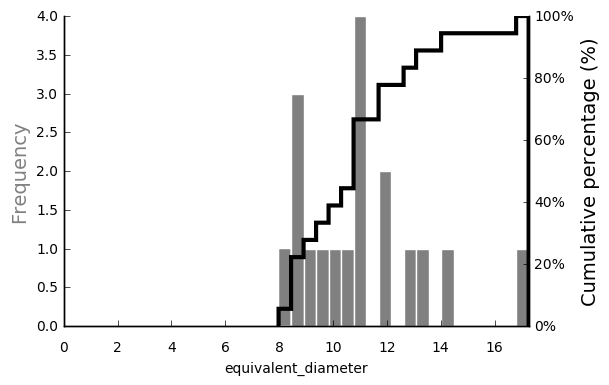

In [45]:
#filtered_bubbles = bubble_properties_filter(props)
#print(filtered_bubbles)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")

##### filter based on custom parameters

In [47]:
custom_filter = {'circularity_reciprocal': {'min': 0.3, 'max': 1.6},
                 'convexity': {'min': 1.92}}

filtered_bubbles = bubble_properties_filter(props, custom_filter)
print(filtered_bubbles)
plt.show()
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")

NameError: name 'bubble_properties_filter' is not defined